# Model Fitting and Evaluation Lab

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ("file:///Users/genevauy/Desktop/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Dividing the DataFrame into numerical and categorical

In [4]:
categorical = df.select_dtypes(include=['object', 'category'])

numerical = df.select_dtypes(include=['int', 'float'])

print("Categorical variables:")
print(categorical.columns)

print("\nNumerical variables:")
print(numerical.columns)


Categorical variables:
Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

Numerical variables:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')


In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


# X-Y SPLIT

In [6]:
X= numerical [['customer_lifetime_value', 'income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numerical ['total_claim_amount']

In [7]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [27]:
print (X)


       customer_lifetime_value  income  monthly_premium_auto  \
0                         4809   48029                    61   
1                         2228   92260                    64   
2                        14947   22139                   100   
3                        22332   49078                    97   
4                         9025   23675                   117   
...                        ...     ...                   ...   
10684                    15563   61541                   253   
10685                     5259   61146                    65   
10686                    23893   39837                   201   
10687                    11971   64195                   158   
10688                     6857   68942                   101   

       months_since_last_claim  months_since_policy_inception  \
0                            7                             52   
1                            3                             26   
2                           34      

In [8]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=42)

## Model Generation

In [11]:
from sklearn.preprocessing import StandardScaler
import math
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
y_train = np.array(y_train).reshape (-1,1)
y_test = np.array(y_test).reshape (-1,1)

In [13]:
from sklearn.preprocessing import PowerTransformer
# Create an instance of the PowerTransformer
scaler = PowerTransformer()
# Fit the scaler to the training data
scaler.fit(y_train)
# Transform the training and testing data using the scaler
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
lm = LinearRegression ()
model = lm.fit(X_train_scaled, y_train_scaled)

In [16]:
model.coef_

array([[-0.01810115, -0.14663055,  0.53927185, -0.00370181, -0.01243452,
         0.00488175,  0.01323769]])

In [17]:
model.intercept_

array([1.24381179e-16])

## Let's see if it works

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
y_test_scaled - y_pred

array([[-0.62006558],
       [ 0.49321674],
       [-0.25908525],
       ...,
       [-1.69843655],
       [ 0.20918782],
       [-1.15571159]])

In [20]:
compare = pd.DataFrame ({'y_test_scaled':list (y_test_scaled),'y_pred':list (y_pred)})

In [21]:
compare

,y_test_scaled,y_pred
0,[-1.2387499175552843],[-0.6186843389660407]
1,[0.8701935867657831],[0.37697685033735334]
2,[-0.5585159186419132],[-0.29943066567331]
3,[-1.4876690952808187],[-0.4818307372622749]
4,[1.7630428206144622],[1.9403245432719594]
...,...,...
3202,[0.0896398726285492],[0.35588200131318976]
3203,[-0.22863433163092406],[-0.3726710091521244]
3204,[-1.8723978026313317],[-0.17396125069345492]
3205,[0.694183210335347],[0.48499538697169775]


### Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [23]:
mse (y_test_scaled, y_pred)

0.6785395259064826

In [24]:
mae (y_test_scaled, y_pred)

0.5967945892328899

In [25]:
import matplotlib.pyplot as plt


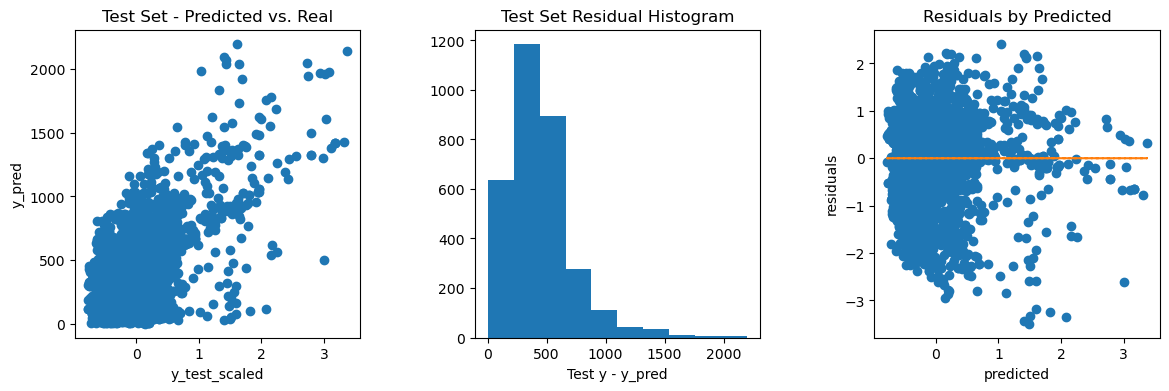

In [26]:


fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test_scaled")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs. Real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y - y_pred")
ax[1].set_title("Test Set Residual Histogram")

ax[2].plot(y_pred, y_test_scaled - y_pred, "o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred, np.zeros(len(y_pred)), linestyle='dashed')

plt.show()


## COEF DF

In [28]:

# Assuming your model.coef_ array is already defined
coefs = np.array([[-0.01810115, -0.14663055, 0.53927185, -0.00370181, -0.01243452, 0.00488175, 0.01323769]])

# Create coef_df DataFrame
column_names = X.columns
coef_df = pd.DataFrame({"column_names": column_names, "coefs": coefs.flatten()})

print(coef_df)


                    column_names     coefs
0        customer_lifetime_value -0.018101
1                         income -0.146631
2           monthly_premium_auto  0.539272
3        months_since_last_claim -0.003702
4  months_since_policy_inception -0.012435
5      number_of_open_complaints  0.004882
6             number_of_policies  0.013238


In [29]:
coef_df

,column_names,coefs
0,customer_lifetime_value,-0.018101
1,income,-0.146631
2,monthly_premium_auto,0.539272
3,months_since_last_claim,-0.003702
4,months_since_policy_inception,-0.012435
5,number_of_open_complaints,0.004882
6,number_of_policies,0.013238


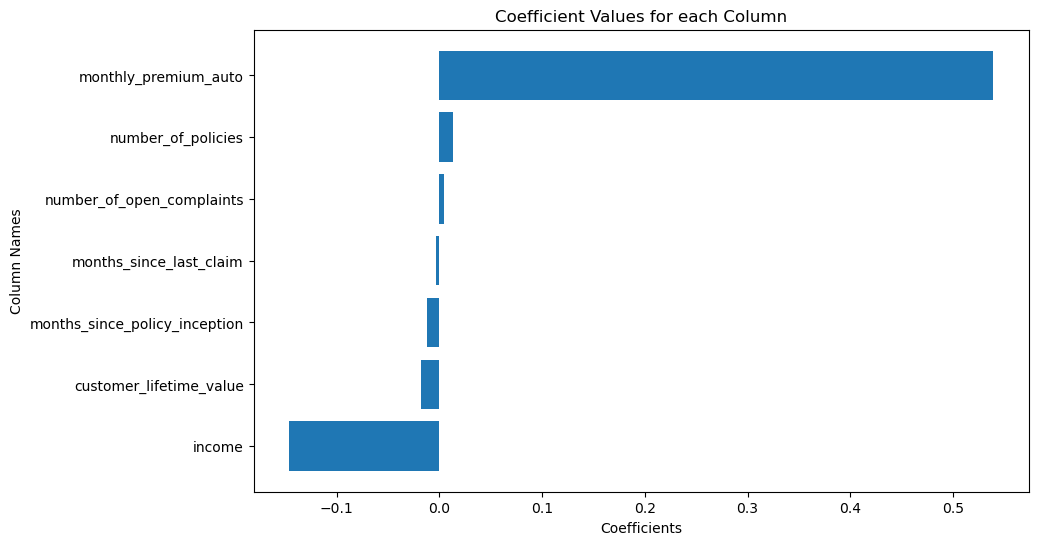

In [33]:

# Sorting the DataFrame by "coefs" column in ascending order
coef_df_sorted = coef_df.sort_values(by="coefs")

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.barh(coef_df_sorted["column_names"], coef_df_sorted["coefs"])
plt.xlabel("Coefficients")
plt.ylabel("Column Names")
plt.title("Coefficient Values for each Column")
plt.show()
